# A/B Testing - Bayesian Approach.

In [1]:
reset -fs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import beta as beta_dist
%matplotlib inline

In [3]:
baseline_df = pd.read_csv('data/baseline.csv', header=None).T

In [4]:
baseline_df

,0,1,2,3,4,5,6
0,Unique cookies to view page per day:,"Unique cookies to click ""Start free trial"" per...",Enrollments per day:,"Click-through-probability on ""Start free trial"":","Probability of enrolling, given click:","Probability of payment, given enroll:","Probability of payment, given click"
1,40000,3200,660,0.08,0.20625,0.53,0.109313


In [5]:
new_header = baseline_df.iloc[0] #grab the first row for the header
baseline_df = baseline_df[1:] #take the data less the header row
baseline_df.rename(columns = new_header) #set the header row as the df header

,Unique cookies to view page per day:,"Unique cookies to click ""Start free trial"" per day:",Enrollments per day:,"Click-through-probability on ""Start free trial"":","Probability of enrolling, given click:","Probability of payment, given enroll:","Probability of payment, given click"
1,40000,3200,660,0.08,0.20625,0.53,0.109313


In [6]:
control_df = pd.read_csv('data/control.csv')

In [7]:
control_df.rename(columns={'Date': 'date', 'Pageviews': 'unique_cookies_pageviews', 'Clicks': 'unique_cookies_clicks', 'Enrollments': 'users_enrolled', 'Payments': 'user_enrolled_payments'}, inplace=True)

In [8]:
control_df

,date,unique_cookies_pageviews,unique_cookies_clicks,users_enrolled,user_enrolled_payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0
5,"Thu, Oct 16",9670,823,138.0,82.0
6,"Fri, Oct 17",9008,748,146.0,76.0
7,"Sat, Oct 18",7434,632,110.0,70.0
8,"Sun, Oct 19",8459,691,131.0,60.0
9,"Mon, Oct 20",10667,861,165.0,97.0


In [9]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
date                        37 non-null object
unique_cookies_pageviews    37 non-null int64
unique_cookies_clicks       37 non-null int64
users_enrolled              23 non-null float64
user_enrolled_payments      23 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [10]:
control_df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,unique_cookies_pageviews,unique_cookies_clicks,users_enrolled,user_enrolled_payments
count,37.000000,37.000000,23.000000,23.000000
mean,9339.000000,766.972973,164.565217,88.391304
std,740.239563,68.286767,29.977000,20.650202
min,7434.000000,632.000000,110.000000,56.000000
25%,8896.000000,708.000000,NaN,NaN
50%,9420.000000,759.000000,NaN,NaN
75%,9871.000000,825.000000,NaN,NaN
max,10667.000000,909.000000,233.000000,128.000000


In [11]:
experiment_df = pd.read_csv('data/experiment.csv')

In [12]:
experiment_df.rename(columns={'Date': 'date', 'Pageviews': 'unique_cookies_pageviews', 'Clicks': 'unique_cookies_clicks', 'Enrollments': 'users_enrolled', 'Payments': 'user_enrolled_payments'}, inplace=True)

In [13]:
experiment_df

,date,unique_cookies_pageviews,unique_cookies_clicks,users_enrolled,user_enrolled_payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0
5,"Thu, Oct 16",9500,788,129.0,61.0
6,"Fri, Oct 17",9088,780,127.0,44.0
7,"Sat, Oct 18",7664,652,94.0,62.0
8,"Sun, Oct 19",8434,697,120.0,77.0
9,"Mon, Oct 20",10496,860,153.0,98.0


In [14]:
experiment_df

,date,unique_cookies_pageviews,unique_cookies_clicks,users_enrolled,user_enrolled_payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0
5,"Thu, Oct 16",9500,788,129.0,61.0
6,"Fri, Oct 17",9088,780,127.0,44.0
7,"Sat, Oct 18",7664,652,94.0,62.0
8,"Sun, Oct 19",8434,697,120.0,77.0
9,"Mon, Oct 20",10496,860,153.0,98.0


In [15]:
experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
date                        37 non-null object
unique_cookies_pageviews    37 non-null int64
unique_cookies_clicks       37 non-null int64
users_enrolled              23 non-null float64
user_enrolled_payments      23 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [16]:
experiment_df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,unique_cookies_pageviews,unique_cookies_clicks,users_enrolled,user_enrolled_payments
count,37.000000,37.000000,23.000000,23.000000
mean,9315.135135,765.540541,148.826087,84.565217
std,708.070781,64.578374,33.234227,23.060841
min,7664.000000,642.000000,94.000000,34.000000
25%,8881.000000,722.000000,NaN,NaN
50%,9359.000000,770.000000,NaN,NaN
75%,9737.000000,827.000000,NaN,NaN
max,10551.000000,884.000000,213.000000,123.000000


In [17]:
alpha = 1
beta = 1

In [18]:
n_samples = 10000

In [19]:
Control_samples = beta_dist(a = control_df['unique_cookies_clicks'].sum() + alpha,
                     b = control_df['unique_cookies_pageviews'].sum() + beta,
                     size = n_samples)

In [20]:
Experiment_samples = beta_dist(a = experiment_df['unique_cookies_clicks'].sum() + alpha,
                     b = experiment_df['unique_cookies_pageviews'].sum() + beta,
                     size = n_samples)

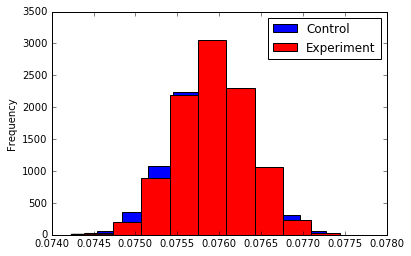

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
pd.DataFrame({'Control': Control_samples}).plot(kind='hist', ax=ax, legend=True);
pd.DataFrame({'Experiment': Experiment_samples}).plot(kind='hist', ax=ax, legend=True, color='red');

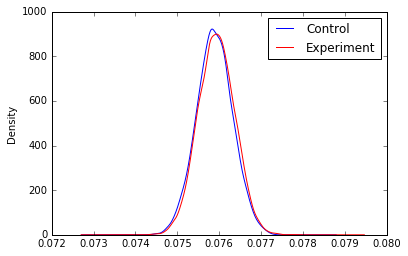

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
pd.DataFrame({'Control': Control_samples}).plot(kind='kde', ax=ax, legend=True);
pd.DataFrame({'Experiment': Experiment_samples}).plot(kind='kde', ax=ax, legend=True, color='red');

In [23]:
A_v_B = np.mean(Control_samples > Experiment_samples)
print("A_v_B: {:.2%}".format(A_v_B))

A_v_B: 46.68%


In [24]:
print("The probability that A is better B: {:.2%}".format(A_v_B))
print('\n\nBaseline (pure) chance that A is better B is .5')

The probability that A is better B: 46.68%


Baseline (pure) chance that A is better B is .5
